# Quantum Phase Measurement HW 2.2  #

Qiskit documentation used:
 1.  https://qiskit.org/textbook/ch-states/representing-qubit-states.html 
 2.  https://qiskit.org/textbook/ch-demos/chsh.html
 3.  https://quantum-computing.ibm.com/composer/docs/iqx/guide/introducing-qubit-phase

Here are my import statements. I used the same qiskit documentation as in Part 2.1

In [1]:
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, assemble, Aer, IBMQ, transpile
from numpy import pi
from math import atan2
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
import time

# Connecting circuit to the quantum computer

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
quito = provider.get_backend('ibmq_quito')

I only need one qubit. This is what is needed to initialize the environment.

In [3]:
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

**For measuring the real component, you need to:**
1. Zero the qubit
2. Add the first Hadamard gate
3. Add some phase change
4. Add another Hadamard gate to recombine
5. Measure

## Real Circuit

In [5]:
circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.p(pi/3, qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

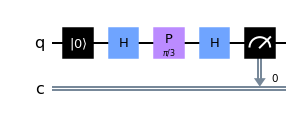

In [6]:
circuit.draw()

Transpile the circuit and send to the quantum computer you are using. In this example, I am using *quito*

In [7]:
tic = time.time()
transpiled_circuits = transpile(circuit, quito)
job_real = quito.run(transpiled_circuits, shots=8192)
job_monitor(job_real)
result_real = job_real.result()
toc = time.time()

print(toc-tic)

Job Status: job has successfully run
10.191361427307129


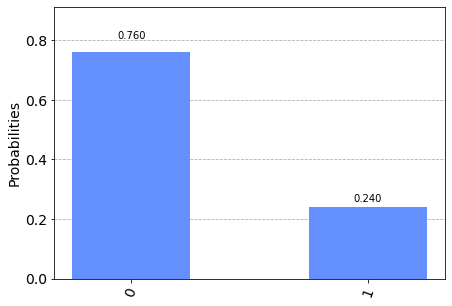

In [8]:
counts = result_real.get_counts(circuit)
plot_histogram(counts)

In [9]:
print(counts)

{'0': 6222, '1': 1970}


## Imaginary Circuit
Need to add another gate for the imaginary component for measuring the phase
`circuit_i.sdg(qreg_q[0])` rotates the imaginary axis onto the real axis

In [10]:
circuit_i = QuantumCircuit(qreg_q, creg_c)

In [11]:
circuit_i.reset(qreg_q[0])
circuit_i.h(qreg_q[0])
circuit_i.p(pi/3, qreg_q[0])
circuit_i.sdg(qreg_q[0])
circuit_i.h(qreg_q[0])
circuit_i.measure(qreg_q[0], creg_c[0])

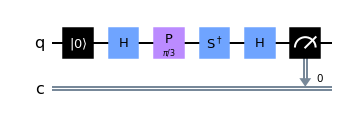

In [12]:
circuit_i.draw()

Transpile the circuit and send to the quantum computer you are using. In this example, I am using *quito* again

In [13]:
tic = time.time()
transpiled_circuits_i = transpile(circuit_i, quito)
job_i = quito.run(transpiled_circuits_i, shots=8192)
job_monitor(job_i)
result_i = job_i.result()
toc = time.time()

print(toc-tic)

Job Status: job has successfully run
9.279547929763794


In [14]:
counts_i = result_i.get_counts(circuit_i)

Following documentation (3), the x components for the atan2 function is the difference between the percentage of state 0 and the percentage of state 1 occurring

(divide by the number of shots to get the percentage) 

The same follows for y

In [15]:
real_diff = (counts['0']-counts['1'])/8192
print(real_diff)

0.51904296875


In [16]:
imag_diff = (counts_i['0']-counts_i['1'])/8192
print(imag_diff)

0.834716796875


In [17]:
x = real_diff / (real_diff**2 + imag_diff**2)
y = imag_diff / (real_diff**2 + imag_diff**2)

In [18]:
angle = atan2(y,x)

In [19]:
print(angle)
print(pi/3)

1.0144875661311132
1.0471975511965976


The phase I used was $\frac{\pi}{3}$, which is fairly close to the result obtained by the quantum computer